# Coding the Lorenz Model

Edward Lorenz was a mathematician, meteorologist, and was one of the fathers of chaos theory. He had set out to create a simple mathematical model for describing how the atmosphere works by the following equations:

$$\frac{dx}{dt}=-\sigma(x-y)$$

$$\frac{dy}{dt}=x(r-z)-y$$

$$\frac{dz}{dt}=xy-bz$$

These equations approximately explain the properties of a fluid layer warmed from below and cooled from the top in a uniform manner. the variable $(x)$ represents the flow intensity, the variable $(y)$ represents the temperature difference between rising and falling currents, and the variable $(z)$ represents the temperature gradient. Additionally, for the the parameters (which are all positive), $(\sigma)$ represents the Prandtl number, $(r)$ represents the Rayleigh number, and $(b)$ represent certain physical dimensions of the layer itself.

After iterating through his program many times, Lorenz realized that his model was very sensitive to initial conditions, such that the smallest change in one of the initial condition would make a large change down the line. The aformentioned reason is actually what caused Lorenz to coin the term "butterfly affect', because he stated that even a butterfly flapping their wings two weeks before a major tornado could have influence on that tornado. With certain initial conditions the Lorenz model would go chaotic and rotate around 2 great attractors. The Lorenz model is a very simplified version of how the atmosphere actually works but it did show the chaos and complexity in the atmosphere even with this simple of a model, and because of this chaotic behavior it is a nonlinear physical system.

Lets begin coding the Lorenz Model! 



### Step 1: Import Necessary Packages

In [1]:
%matplotlib notebook

We need to import several packages so that we can code the Lorenz Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ode
from scipy.optimize import curve_fit
#from IPython.display import display, Markdown, Latex
#from vpython import * 
from mpl_toolkits import mplot3d
from ipywidgets import interactive


### Step 2: Define Differential Equation Function

This function `lfunc` calculates our three differential equations for each time step $(h)$

The $y_0$ vector within the model function contains the initial $x$,$y$, & $z$ values, which is then passed to `lfunc` along with the time $(t)$. The initial values are then used to calate our differential equations $dxdt$, $dydt$, & $dzdt$.
Once calculated, our differential equation values are converted to an array and returned to the model function.

In [3]:
def lfunc(y0,t):
    x = y0[0]
    y = y0[1]
    z = y0[2]
    dxdt = -sigma*(x-y)
    dydt = x*(r-z)-y
    dzdt = x*y-b*z
    return np.array([dxdt, dydt, dzdt])

### Step 3: Define Model Function

The independent variable for the Lorenz Model is time $(t)$

The dependent variables for the Lorenz Model are $(x)$, $(y)$, and $(z)$

The constants for the Lorenz Model are $(\sigma)$, $(r)$, and $(b)$

To begin, we are going to create a model function `runlorenz` that will calculate everything necessary to create the graph. We are creating the initial values sigma, r, b, x, y, z, and total time to be arguments so that we can call the function later. Additionally we need to make sigma, b, and r global variables so that they can be used within other functions.

After the calculations take place, our model function will return all of the time data, x data, y data, and z data.

In [4]:
def runlorenz(sigma_i = 10,r_i = 28,b_i = 8/3, x_i = 0, y_i = 1, z_i = 0, t_total=30):
    
    global sigma,b, r #we are making the constants global so that they can be used within other functions
    
    #constants
    sigma = sigma_i  #initial sigma value
    y = y_i          #initial y value
    x = x_i          #initial z value
    r = r_i          #initial r value
    z = z_i          #initial z value
    b = b_i          #initial b value
    
    
    t = 0.0          #initial time
    h = 0.001        #time step
    
    #data
    y0 = [x_i,y_i,z_i] #list containing the initial values for x, y, and z
    tdata = []         #list that stores the time data
    xdata = []         #list that stores the x data
    ydata = []         #list that stores the y data
    zdata = []         #list that stores the z data
    
    tdata.append(t)
    xdata.append(x_i)
    ydata.append(y_i)
    zdata.append(z_i)
    
    while t<t_total:      #this calculates to values of the differential equations at each time step (h) until t_total is reached
        y1 = ode.RK4n(lfunc, y0, t, h) #update y[n]

        for i in range(len(y1)): #reset y0 to the new vector
            y0[i] = y1[i]

        t = t + h #update clock
        
        tdata.append(t)
        xdata.append(y1[0])
        ydata.append(y1[1])
        zdata.append(y1[2])

    return np.array(tdata), np.array(xdata), np.array(ydata), np.array(zdata)

### Step 4 Plot the Data

Here we are calling our model function `runlorenz` which calculated all of the data for us, and then we are passing this information to tdata, xdata, ydata, & zdata so that we can plot the data. We will be plotting the data in 3D . Additionally, since we are using `matplotlib notebook` you can grab the figures and rotate them, or you can zoom in and out on them.

Common parameter values for a good Lorenz Graph with two attractors are $\sigma = 10$, $r = 28$, & $b = \frac{8}{3}$

<IPython.core.display.Javascript object>


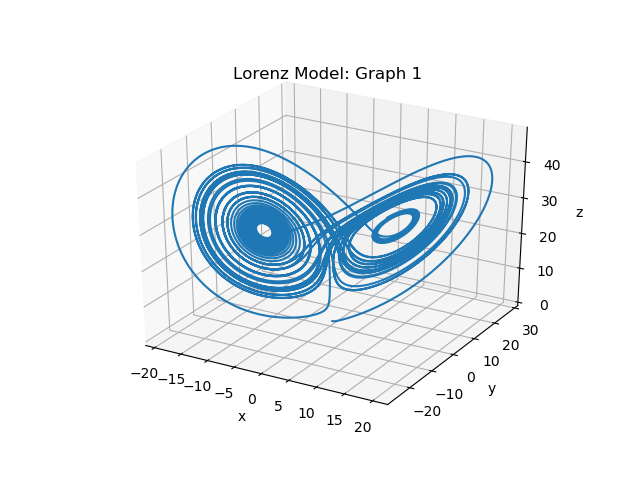

Text(0.5,0,'z')

In [5]:
tdata, xdata, ydata, zdata = runlorenz(sigma_i = 10,r_i = 28,b_i = 8/3,x_i = 0, y_i = 1, z_i = 0, t_total=50)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xdata,ydata,zdata)
ax.set_title('Lorenz Model: Graph 1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Graph 1 shows the most popular Lorenz Figure that you will see. You see the data revolving around 2 attractors that have been created by the Lorenz equations and certain intial conditions. Another interesting way to visualize graph 1 is to bring time into the graph so you can see how it is plotted through time.

<IPython.core.display.Javascript object>


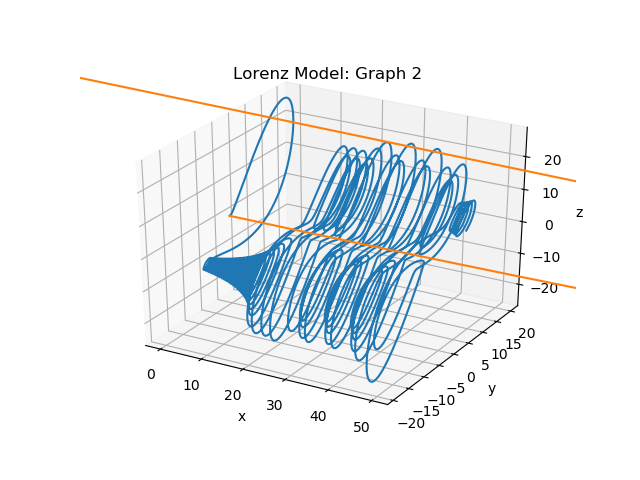

Text(0.5,0,'z')

In [7]:
tdata, xdata, ydata, zdata = runlorenz(sigma_i = 10,r_i = 28,b_i = 8/3,x_i = 0, y_i = 1, z_i = 0, t_total=50)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(tdata,xdata,ydata,zdata)
ax.set_title('Lorenz Model: Graph 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


Lets change the initial conditions and see if we can make a graph around just 1 attractor.

Lets change our b value from $b=\frac{8}{3}$ to $b=8$

<IPython.core.display.Javascript object>


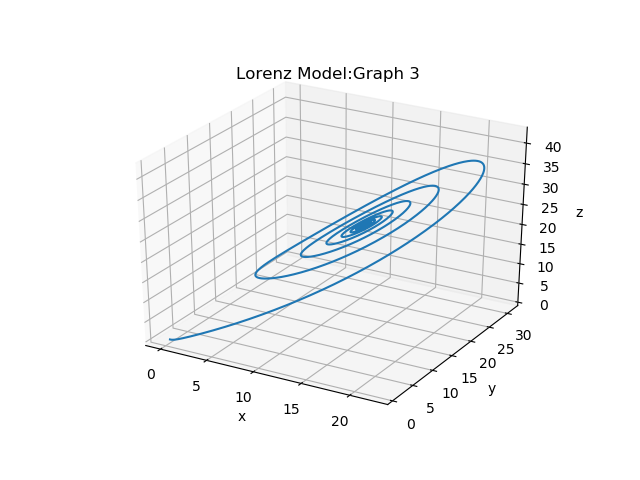

Text(0.5,0,'z')

In [7]:
tdata, xdata, ydata, zdata = runlorenz(sigma_i = 10,r_i = 28,b_i = 8,x_i = 0, y_i = 1, z_i = 0, t_total=50)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xdata,ydata,zdata)
ax.set_title('Lorenz Model:Graph 3')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

As you can see, there is only 1 attractor in graph 3. Lets see if there is a different way we can make there be just 1 attractor. We will change $(b)$ back to $\frac{8}{3}$ and then change $r=28$ to $r=10$

<IPython.core.display.Javascript object>


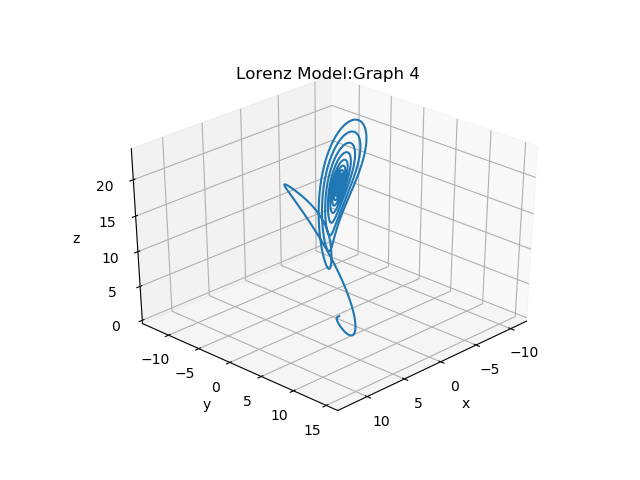

Text(0.5,0,'z')

In [8]:
tdata, xdata, ydata, zdata = runlorenz(sigma_i = 10,r_i = 15,b_i = 8/3,x_i = 0, y_i = 1, z_i = 0, t_total=50)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xdata,ydata,zdata)
ax.set_title('Lorenz Model:Graph 4')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


In graph 4, you can see how by changing our $r$ value, it looks different than either of the earlier graphs. This is just a little bit of an example of how sensitive the Lorenz model is to initial conditions. Lets look at 1 more example where we change $r$ to be $r=100000$.

<IPython.core.display.Javascript object>


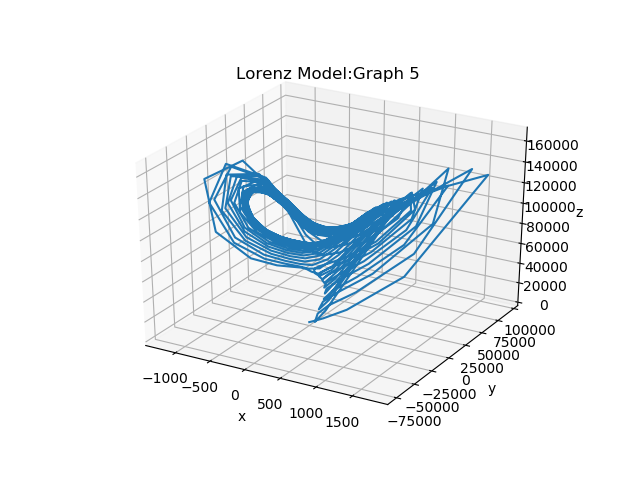

Text(0.5,0,'z')

In [9]:
tdata, xdata, ydata, zdata = runlorenz(sigma_i = 10,r_i = 100000,b_i = 8/3,x_i = 0, y_i = 1, z_i = 0, t_total=50)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xdata,ydata,zdata)
ax.set_title('Lorenz Model:Graph 5')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


By changing the r value a great deal you can see in Graph 5 how it looks completely different from any of the other graphs!

Feel free to play around with the initial values and create some interesting graphs!!

You now know how to code the Lorenz Model, great Job!!